In [1]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

#import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#improting dataset
train = pd.read_csv('./Dataset/digit-recognizer/train.csv')
test = pd.read_csv('./Dataset/digit-recognizer/test.csv')
sample_sub = pd.read_csv('./Dataset/digit-recognizer/sample_submission.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
#train summary
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
#splitting train columns into features and label column
#X as features
X = train.drop(['label'],axis=1)
#y as target
y = train['label']

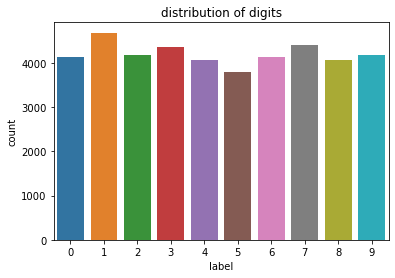

In [8]:
#checking the label
sns.countplot(y)
plt.title('distribution of digits')
plt.show()

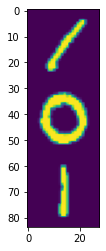

In [9]:
#there is 784 pixel columns, so we can assume that there is a pic with 28x28 dimension
#check one of row proofing that the assumption is true

proof = X.to_numpy()[0:3].reshape(84,28)

#plotting the image
plt.imshow(proof)
plt.show()

In [10]:
#take a look for train and features rows total
train_total = train.shape[0]
print(train_total)
test_total = test.shape[0]
print(test_total)

42000
28000


In [11]:
#import mode dataset
(x_train1, y_train1), (x_val1, y_val1) = tf.keras.datasets.mnist.load_data()

train1 = np.concatenate([x_train1, x_val1], axis=0)
y_train1 = np.concatenate([y_train1, y_val1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28*28)

In [12]:
#merging X, y and train1
X_train = np.concatenate((X.values, X_train1))
Y_train = np.concatenate((y, Y_train1))
#reshapping X_train
X_train = X_train.reshape(-1,28,28,1)

In [13]:
#label encoding
Y_train = np_utils.to_categorical(Y_train).astype('int32')

In [14]:
#splitting to train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size=0.1, 
                                                  shuffle=False,
                                                  random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(100800, 28, 28, 1) (11200, 28, 28, 1) (100800, 10) (11200, 10)


In [14]:
#reshaping features
# X_train = X_train.values.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
# X_val = X_val.values.reshape(X_val.shape[0], 28, 28 , 1).astype('float32')

In [51]:
#data augmentation
def train_val_generators(X_train,y_train,X_val,y_val):
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     featurewise_center=False,
                                     featurewise_std_normalization=False,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow(X_train,
                                       y_train,
                                       batch_size=60,
                                       )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow(X_val,
                                                 y_val,
                                                 batch_size=60,
                                                 )
  
  return train_generator, validation_generator

# Test your generators
train_generator, validation_generator = train_val_generators(X_train,y_train,X_val,y_val)

In [57]:
#define model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 1, 64)        

In [58]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
#define callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print("Stop training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [60]:
#model fitting
history = model.fit(train_generator,
                    epochs=1000,
                    validation_data=validation_generator,
                    #steps_per_epoch = len(train_generator) / 60,
                    #validation_steps = len(validation_generator) / 60,
                    callbacks=[callbacks])

Epoch 1/1000
1680/1680 [==============================] - 29s 17ms/step - loss: 0.2435 - accuracy: 0.9239 - val_loss: 0.0938 - val_accuracy: 0.9695
Epoch 2/1000
1680/1680 [==============================] - 27s 16ms/step - loss: 0.0786 - accuracy: 0.9756 - val_loss: 0.0783 - val_accuracy: 0.9774
Epoch 3/1000
1680/1680 [==============================] - 27s 16ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0443 - val_accuracy: 0.9871
Epoch 4/1000
1680/1680 [==============================] - 27s 16ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0478 - val_accuracy: 0.9871
Epoch 5/1000
1680/1680 [==============================] - 28s 16ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0448 - val_accuracy: 0.9890
Epoch 6/1000
1680/1680 [==============================] - 28s 17ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0317 - val_accuracy: 0.9908
Epoch 7/1000
1680/1680 [==============================] - 29s 17ms/step - loss: 0.0314 - accuracy: 0.9902 - val_

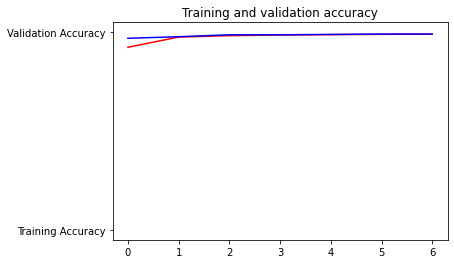

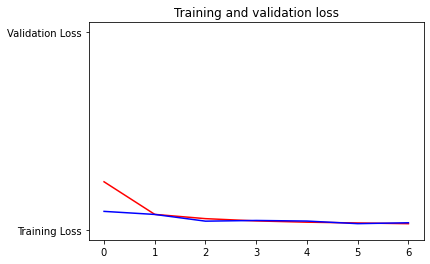

In [61]:
#training plot
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.show()

In [62]:
#prediction and submission

#reshapping test dataset
test_pred = (test.values).reshape(-1, 28, 28 , 1).astype('float32')

#predicting value
pred = model.predict(test_pred)
pred = np.argmax(pred,axis = 1)
pred = pd.Series(pred, name="Label")

#submission
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   pred],axis = 1)
submission.to_csv("submission.csv",index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,0
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
